We can use html5 for animation, as suggested in this web page: http://louistiao.me/posts/notebooks/embedding-matplotlib-animations-in-jupyter-notebooks/

This seems to be the modern way to do animation in Python. 



First step is to initialize some things in Python.
- we need %matplotlib inline to get things to plot right on the notebook
- we need numpy for the math
- se need matplotlib for plotting
- we need animation from matplotlib, and HTML from iPython.display to show the animations

We get all these with the following imports:



In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

We now have four steps to get an animated plot

- set up the figure frame
- define the initializing function
- define the function that draws each frame of the animation
- call the animator function, which creates all the frames and saves them for you

Then we are ready to call "HTML" to display the animation.


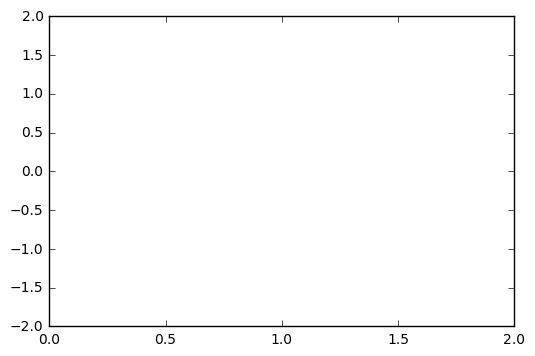

In [2]:
# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim(( 0, 2))
ax.set_ylim((-2, 2))

line, = ax.plot([], [], lw=2)

In [3]:
# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return (line,)

In [4]:
# animation function. This is called sequentially
def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return (line,)

In [5]:
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=20, blit=True)

In [6]:
HTML(anim.to_html5_video())

 Anytime you need the animation, you can call it up at will, with the following code:

In [8]:
# equivalent to rcParams['animation.html'] = 'html5'
rc('animation', html='html5')